In [20]:
import pandas as pd
import gensim
import json
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [21]:
def data_reader(file):
    my_dict={}
    my_list_of_comments=[]
    loaded_json=json.load(open(file))
    doc_list=loaded_json["All questions"]
    for i in range(len(doc_list)):
        my_dict[doc_list[i]['url']]=doc_list[i]['title']+" "+doc_list[i]['description']
        my_list_of_comments.append(doc_list[i]['description'])
    return my_dict,my_list_of_comments

def remove_nonwords(text):
    import re
    non_words = re.compile(r"[^a-z']")
    processed_text = re.sub(non_words, ' ', text)
    return processed_text.strip()

def remove_stopwords(text):
    from nltk.corpus import stopwords
    stopwrds=stopwords.words('english')
    words = [word for word in text.split() if word not in stopwrds]
    return words

def stem_words(words):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

def preprocess_text(text):
    processed_text = remove_nonwords(text.lower())
    words = remove_stopwords(processed_text)
    stemmed_words = stem_words(words)
    return stemmed_words

def create_corpus(list_of_sentences):
    results=[]
    for sentence in list_of_sentences:
        processed=preprocess_text(sentence)
        results.append(processed)
    return results

In [22]:
path=r"C:\Users\Nikos\Desktop\DATA_SPOUDES\MyLibs\vector-space-retrieval-model-master\vector-space-retrieval-model-master\sample_100_without_duplicates.json"
my_dict,sentences=data_reader(path)


In [23]:
df=pd.DataFrame.from_dict(my_dict, orient='index', columns=['text'])

In [24]:
df['text'][0]

"django.core.exceptions.FieldError: Unknown field(s) (PhoneNumber, City, Email, KYCDocument, Image, Speciality) specified for Doctor I am trying to make a form using modelsform, it was working fine but, suddenly I don't know what suddenly happens and it started giving me this error django.core.exceptions.FieldError: Unknown field(s) (PhoneNumber, City, Email, KYCDocument, Image, Speciality) specified for Doctor I have checked this error online and tried some solutions but nothing workout form me . here is forms.py file here is models.py file site design / logo © 2021 Stack Exchange Inc; user contributions licensed under cc by-sa.                    rev\xa02021.10.12.40432"

In [25]:
L=[]
for i in df['text']:
    x=preprocess_text(i)
    L.append(x)
    

In [26]:
df['words']=L

In [27]:
df

,text,words
https:/stackoverflow.com/questions/69553953/django-core-exceptions-fielderror-unknown-fields-phonenumber-city-email-k,django.core.exceptions.FieldError: Unknown fie...,"[django, core, except, fielderror, unknown, fi..."
https:/stackoverflow.com/questions/69553950/error-in-camera-app-type-error-null-on-getcontext,Error in camera App / Type error: null on 'get...,"[error, camera, app, type, error, null, 'getco..."
https:/stackoverflow.com/questions/69553949/equals-operator-difference,Equals operator difference Actual output 16461...,"[equal, oper, differ, actual, output, question..."
https:/stackoverflow.com/questions/69553947/how-to-test-react-application-bundled-in-webpack-that-uses-require-functions,How to test React application bundled in Webpa...,"[test, react, applic, bundl, webpack, use, req..."
https:/stackoverflow.com/questions/69553945/nrows-alternative-for-read-sql-table,nrows alternative for read_sql_table I am a re...,"[nrow, altern, read, sql, tabl, read, sql, tab..."
...,...,...
https:/stackoverflow.com/questions/69547471/unity-submodule-for-core-code-across-multiple-projects,Unity Submodule for Core Code Across Multiple ...,"[uniti, submodul, core, code, across, multipl,..."
https:/stackoverflow.com/questions/69547470/binding-class-to-material-table-data-in-react,Binding Class to Material-Table data in React ...,"[bind, class, materi, tabl, data, react, possi..."
https:/stackoverflow.com/questions/69547469/optimise-mongodb-aggregate-query-performance,Optimise MongoDB aggregate query performance I...,"[optimis, mongodb, aggreg, queri, perform, nex..."
https:/stackoverflow.com/questions/69547464/how-to-iterate-over-nested-array-of-object-in-typescript,How to iterate over nested array of object in ...,"[iter, nest, array, object, typescript, duplic..."


In [28]:
from gensim.models.phrases import Phrases, Phraser

In [29]:
from collections import defaultdict

In [30]:
phrases = Phrases(df['words'], min_count=2, progress_per=10)

In [31]:
bigram = Phraser(phrases)

In [32]:
sentences = bigram[df['words']]

In [33]:
i=0
for sent in sentences:
    i=i+1
    if i >3:
        break

In [34]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

16319

In [35]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['use',
 'site_design',
 'logo_stack',
 'exchang_inc',
 'user_contribut',
 'licens_cc',
 'sa_rev',
 'code',
 'tri',
 'get']

In [36]:
import multiprocessing

from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()

In [37]:
model=Word2Vec(window=5,min_count=5,workers=cores-1)

model.build_vocab(sentences)

In [38]:

model.train(sentences, total_examples=model.corpus_count, epochs=30)


(5606907, 7074150)

In [39]:
#model.save(r"C:\Users\Nikos\Desktop\DATA_SPOUDES\Lessons\Fall\Search Engines and Web Mining\word2vec trainer\model2.model")

In [74]:
search="sql"
x=model.wv.most_similar(search)
matching = [s[0] for s in x if search in s[0] if "_" in s[0]]
matching

['sql_server', 'sql_queri']

In [52]:
x

[('postgr', 0.6279500722885132),
 ('sql_server', 0.5849608182907104),
 ('store_procedur', 0.5819005966186523),
 ('sql_queri', 0.5781052112579346),
 ('develop_web', 0.5644525289535522),
 ('jpa', 0.548076868057251),
 ('oracl', 0.5377245545387268),
 ('join', 0.5303351283073425),
 ('psql', 0.5278376340866089),
 ('sqlite', 0.5270789861679077)]

['sql_server', 'sql_queri']

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [43]:
def tsnescatterplot(model, word):
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)

    close_words = model.wv.most_similar([word])

    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    reduc = PCA(n_components=2).fit_transform(arrays)

    np.set_printoptions(suppress=True)

    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

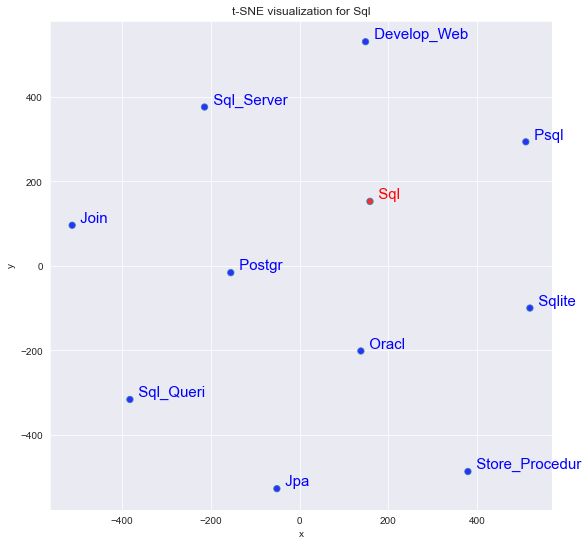

In [44]:
tsnescatterplot(model, 'sql')

In [45]:
def tsnescatterplot1(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=11).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

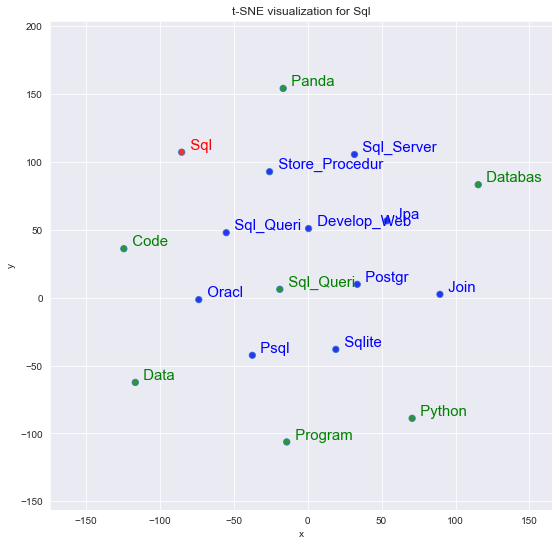

In [46]:
tsnescatterplot1(model, 'sql', ['sql_queri','code','data','databas','program','python','panda'])